In [1]:
import os
import numpy as np
import pandas as pd
import csv

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(context="paper", font_scale=1.5, rc={"lines.linewidth": 2}, font='DejaVu Serif')
#import bottleneck as bn

In [2]:
def loadFilesNamePath(directorRoot: str):
    l_files_name_path = []
    for path, subdirs, files in os.walk(directorRoot):
        for name in files:
            l_files_name_path.append(os.path.join(path, name))
    return l_files_name_path

In [3]:
def loadFile(file_name):
    with open(file_name, 'r') as f:
        file_data = f.read()
        f.close()
    return file_data.splitlines()

In [4]:
"""
========
Function Generating Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
def barCharGenerator(groupListData: list, ListLabel: list, groupListLegend: list
                     , ylabel: str, xlabel: str, title: str, figSize=(15, 9)):
    N = 4
    ind = np.arange(N)  # the x locations for the groups
    width = 0.12       # the width of the bars
    std_CoFactor = [0.01, 0.01, 0.01, 0.01]
    std_1 = [0.02, 0.02, 0.02, 0.02]
    std_2 = [0.01, 0.01, 0.01, 0.01]
    std_3 = [0.02, 0.02, 0.02, 0.02]
    std_4 = [0.01, 0.01, 0.01, 0.01]
    std_5 = [0.01, 0.01, 0.01, 0.01]
    
    #Zerando os pausinhos em cima das barras
    std_CoFactor = std_1 = std_2 = std_3 = std_4 = std_5 = [0,0,0,0]
    
    CoFactor = groupListData[0]
    Other_1 = groupListData[1]
    Other_2 = groupListData[2]
    Other_3 = groupListData[3]
    Other_4 = groupListData[4]
    Other_5 = groupListData[5]

    #Define Plot
    fig, ax = plt.subplots(figsize=figSize)

    rects1 = ax.bar(ind, CoFactor, width, color='yellow', yerr=std_CoFactor)
    rects2 = ax.bar(ind + width, Other_1, width, color='olive', yerr=std_1)
    rects3 = ax.bar(ind + width*2, Other_2, width, color='darkkhaki', yerr=std_2)
    rects4 = ax.bar(ind + width*3, Other_3, width, color='darkseagreen', yerr=std_3)
    rects5 = ax.bar(ind + width*4, Other_4, width, color='lightgreen', yerr=std_4)
    rects6 = ax.bar(ind + width*5, Other_5, width, color='darkolivegreen', yerr=std_5)

    # add some text for labels, title and axes ticks
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticks(ind + (width*5) / 2)
    ax.set_xticklabels(ListLabel)

    ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0]) , groupListLegend)
    
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end, 0.01))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.2f'))

    def autolabel(rects, mult_height):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., mult_height*height,
                    '%2.4f' % float(height),
                    ha='center', va='bottom')

    '''autolabel(rects1, 1.05)
    autolabel(rects2, 1.13)
    autolabel(rects3, 1.05)
    autolabel(rects4, 1.13)
    autolabel(rects5, 1.05)
    autolabel(rects6, 1.13)'''

    plt.show()

In [5]:
def prepraraFiles(list_file_name: list, file_path: str):    
    CoFactor_dic = {'Recall@10':0.1640,'Recall@20':0.1611, 'Recall@50':0.1842, 'Recall@100': 0.2381
                            , 'NDCG@10': 0.1675, 'NDCG@20': 0.1601, 'NDCG@50': 0.1615, 'NDCG@100': 0.1803
                            , 'MAP@10': 0.0965, 'MAP@20': 0.0780, 'MAP@50': 0.0625, 'MAP@100': 0.0593}
    file_dic = {}

    for f_name in list_file_name:
        file_name = f_name.split('_')
        key_name = str.capitalize(file_name[0])+'_'+str.capitalize(file_name[1])+'_'+file_name[2]+'%'
        list_file_content = loadFile(file_path+f_name)
        list_file_content = list(filter(None, list_file_content))
        data_dic = {}

        for line in list_file_content:
            idx = list_file_content.index(line)
            line = line.replace('Test ','').replace(' ','').split(':')
            data_dic[line[0]]=float(line[1])

        file_dic[key_name]=data_dic
    return CoFactor_dic, file_dic

In [6]:
def startCoFactorValues(CoFactor_dic: dict):
    #Determinando Cofactor Dados
    listDataNdcgCoFactor = []
    listDataRecallCoFactor = []
    listDataMapCoFactor = []
    control = 0
    
    for key, value in CoFactor_dic.items():
        control = control+1
        #Armazena Recall
        if (control in np.arange(1,5)):
            listDataRecallCoFactor.append(value)
        #Armazena NDCG
        elif (control in np.arange(5,9)):
            listDataNdcgCoFactor.append(value)
        #Armazena MAP
        elif (control in np.arange(9,13)):
            listDataMapCoFactor.append(value)

    return listDataNdcgCoFactor, listDataMapCoFactor, listDataRecallCoFactor

In [7]:
def geraGraficos(Cofactor_dic: dict, file_dic: dict, firstGroupFile: bool ):
    groupListDataNDCG = []
    groupListDataRECALL = []
    groupListDataMAP = []
    listLabel = []

    ndcg_coFactor, mapCofactor, recall_coFactor = startCoFactorValues(CoFactor_dic)

    groupListDataMAP.append(mapCofactor)
    groupListDataNDCG.append(ndcg_coFactor)
    groupListDataRECALL.append(recall_coFactor)
    listLabel.append('CoFactor')

    #Parametros de controle
    control = 0
    contador = 0


    for key_title, value_list in file_dic.items():
        cnn_name = key_title.split('_')
        listLabel.append(key_title)

        listDataNdcg = []
        listDataRecall = []
        listDataMap = []

        for key_name, value in value_list.items():
            control = control+1

            #Armazena Recall
            if (control in np.arange(1,5)):
                listDataRecall.append(value)
            #Armazena NDCG
            elif (control in np.arange(5,9)):
                listDataNdcg.append(value)
            #Armazena MAP
            elif (control in np.arange(9,13)):
                listDataMap.append(value)

        groupListDataNDCG.append(listDataNdcg)
        groupListDataMAP.append(listDataMap)
        groupListDataRECALL.append(listDataRecall)

        control = 0

        contador = contador + 1
        if contador == 5:
            contador = 0

            barCharGenerator(groupListDataRECALL, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','Recall@k', 'Comparação CoFactor Vs '+cnn_name[0])
            
            print('Recall Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataRECALL, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataRECALL, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)
            
            print('\n\n')    
            barCharGenerator(groupListDataNDCG, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','NDCG@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('NDCG Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataNDCG, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataNDCG, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            print('\n\n')    
            barCharGenerator(groupListDataMAP, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','MAP@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('MAP Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataMAP, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataMAP, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            groupListDataNDCG.clear()
            groupListDataRECALL.clear()
            groupListDataMAP.clear()
            listLabel.clear()

            groupListDataMAP.append(mapCofactor)
            groupListDataNDCG.append(ndcg_coFactor)
            groupListDataRECALL.append(recall_coFactor)
            listLabel.append('CoFactor')

In [8]:
file_path = 'cae_inv_n_norm/less_5/'

## Similaridades menores ou iguais a 5 são defindas como zero.

### Definição dos Dados - Descritivo

Os valores apresentados abaixo nos gráficos, correspondem aos resultados obtidos do Algoritmo CoFactor. A Barra amarela correponde a entrada padrão dos dados, no qual o algoritmo trabalha com a co-ocorrência de itens. As demais barras correpondem a entrada gerada atráves do procedimento a ser descrito abaixo.

#### Redes Neurais Convolutivas

O dataset de imagens (ml20m) foi aplicado a quatro redes neurais convolutivas para extração de suas features. Foram elas Resnet50, Vgg16, Vgg19 e Xception. Uma vez que essas features foram extraídas, uma segunda feature foi extraída de informações textuais do mesmo dataset utilizando uma rede neural chamada Doc2vec. 

Cada feature extraídas da imagens foram concatenadas com a feature de informações textuais, gerando um novo vetor de features.
- Resnet50+Doc2Vec / Vgg16+Doc2Vec / Vgg19+Doc2Vec / Xception+Doc2Vec

#### AutoEnconder's

Cada vetor de features "concatenado" foi aplicado a um tipo de AutoEnconder com o objetivo de gerar uma nova representação do vetor de features original. Os autoencoder's utilizados foram Sparse AutoEncoder, Convolutional AutoEnconder (CAE) e Varitional AutoEncoder (VAE).

As representações geradas do vetor de featuares concatenado, após aplicadas nos autoencoder's foram:

10% - Uma representação com 10% do tamanho do vetor original

20% - Uma representação com 20% do tamanho do vetor original

30% - Uma representação com 30% do tamanho do vetor original

40% - Uma representação com 40% do tamanho do vetor original

50% - Uma representação com 50% do tamanho do vetor original

60% - Uma representação com 60% do tamanho do vetor original

70% - Uma representação com 70% do tamanho do vetor original

80% - Uma representação com 80% do tamanho do vetor original

90% - Uma representação com 90% do tamanho do vetor original

100% - Uma representação com 100% do tamanho do vetor original

### Matriz de Similaridade

Foi gerado uma matrix de similaridade entre os vetores de características (vetor final gerado a partir do AutoEncoder) utilizando o método da "Distância Euclideana". Para os resultados apresentados nesse documento foi utilizado uma "Distância Euclideana Invertida Não Normalizada", ou seja, valores muito proxímos de zero (ou zero) corresponde a vetores que não possuem similaridade nenhum, em contrapartida quanto maior for o valor maior é a similaridade entre os itens.

#### Ajuste de sparsidade
Como medida experimental as similaridades que obtiveram valores menores ou iguais a 5 (cinco) foram consideradas com similaridade nula, ou seja, seu valor foi modificado para 0 (zero).

* Obs: O maior valor encontrado na matriz de similaridade corresponde a similaridade do vetor com ele mesmo.

### Metricas de Avaliação
Medidas de avaliação (ranked-based) foram utilizadas para medir o desempenho da recomendação do algoritmo ao mudar seu dataset de entrada em comparação com o dataset original proposto (co-ocorrência).

Para cada usuário, todas as métricas comparam a classficação prevista de itens "não observados" com sua classificação real. As medidas utilizadas foram Recall, NDCG e Map.

Nos resultados apresentados nos gráficos que seguem, foram considerados nos experimentos um "ranked list" de tamanhos fixados em: 10, 20, 50 e 100, para cada medida de avaliação, por exemplo, NDCG@20 significado que foi considerado um ranked list dos 20 itens no topo da lista.

### Análise Geral
Nós Gráficos apresentados nesse documento que estão relacionados ao AutoEncoder "CAE" é possível verificar que mesmo alterando o tipo da rede neural (vgg's, resnet ou xception) eles apresentam um comportamento bastante similar.

Para a métrica "Recall" quanto maior o valor de @k melhor o resultado.

Para métrica NDCG, os valores de @k entre 10 e 50 tem resultados similares, no entanto, para um @k de 100 o desempenho do algoritmo aumenta consideravelmente.

Na métrica de avaliação MAP o algoritmo tem um comportamento contrário ao Recall, quanto maior o valor de @k pior foi seu desempenho.

#### Tornar o DataSet mais esparso não foi suficiente para modificar significativamente os resultados.

* Em todas as Comparações o BaseLine (CoFactor) utilizado apresentou melhor resultado do que as representações propostas do vetor original.

## Gráficos CoFactor Vs Rede Neural Resnet50

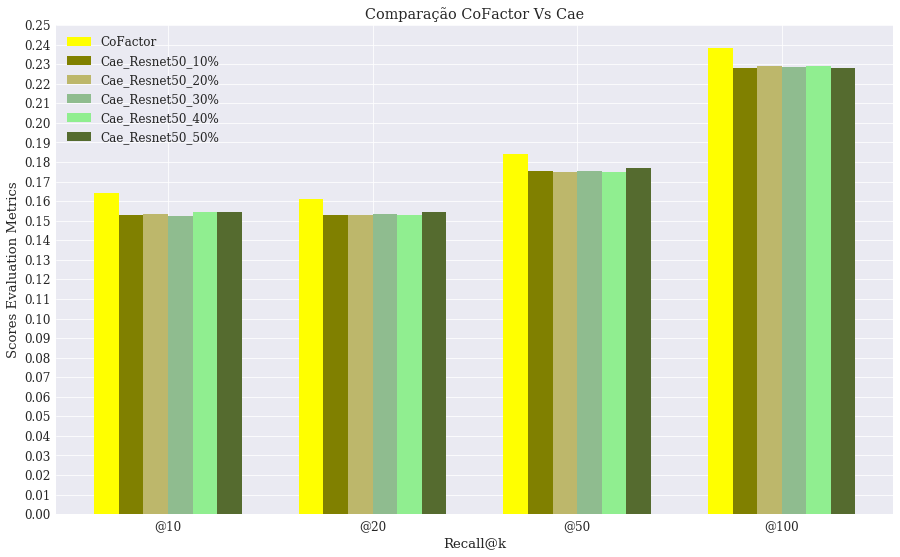

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1528  0.1530  0.1752  0.2279
20%       0.1534  0.1527  0.1749  0.2288
30%       0.1524  0.1534  0.1756  0.2285
40%       0.1544  0.1531  0.1749  0.2289
50%       0.1545  0.1545  0.1770  0.2282





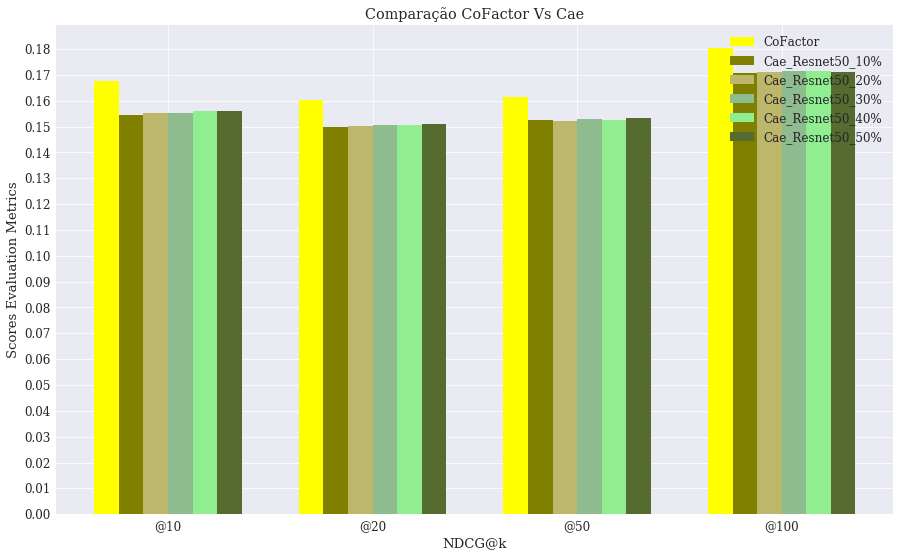

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1546  0.1499  0.1525  0.1709
20%       0.1554  0.1502  0.1523  0.1711
30%       0.1553  0.1506  0.1528  0.1715
40%       0.1560  0.1505  0.1526  0.1715
50%       0.1560  0.1510  0.1533  0.1713





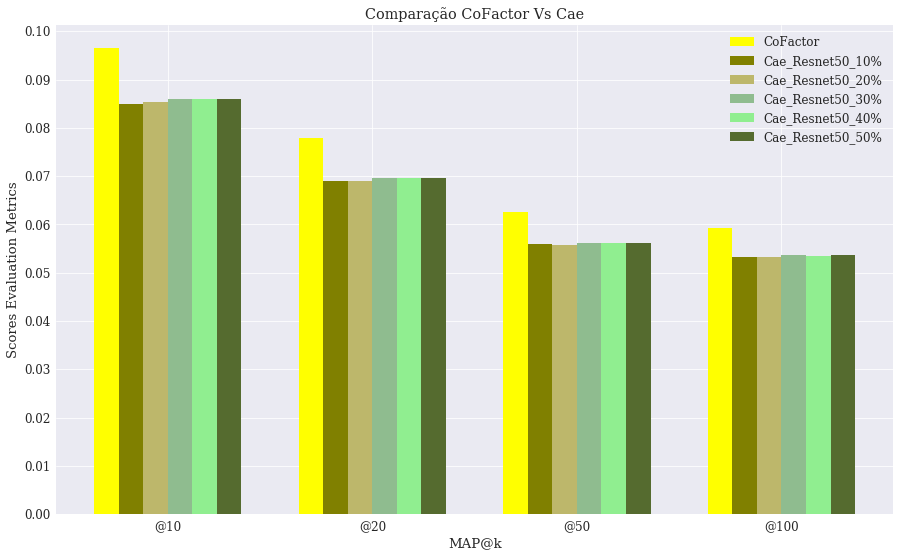

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0849  0.0690  0.0559  0.0532
20%       0.0854  0.0690  0.0557  0.0532
30%       0.0860  0.0696  0.0562  0.0536
40%       0.0860  0.0697  0.0561  0.0535
50%       0.0859  0.0696  0.0562  0.0536


In [9]:
list_file_name = ['cae_r# Organização dos Arquivos
83
Foram criados 3 arquivos notebook, no qual, cada um deles contém um conjunto de gráficos comparando os resultados do BaseLine com as represetaçoes dos AutoEncoder's (sparse, vae, cae) aplicados sobre cada vetor gerado pelas redes neuras (ResNet50, Vgg16, Vgg19 e Xception).esnet50_10_pct_rec_val'
                  , 'cae_resnet50_20_pct_rec_val'
                  , 'cae_resnet50_30_pct_rec_val'
                  , 'cae_resnet50_40_pct_rec_val'
                  , 'cae_resnet50_50_pct_rec_val']

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

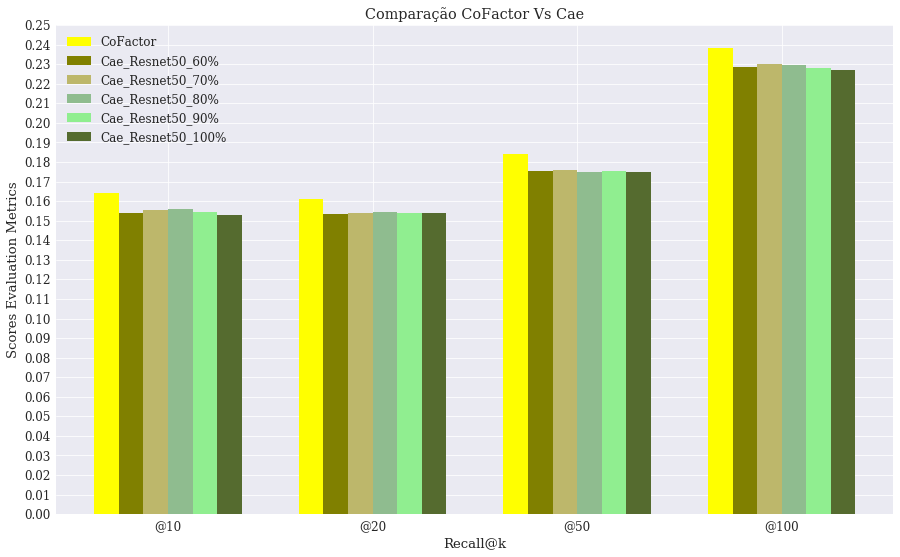

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1540  0.1534  0.1756  0.2285
70%       0.1554  0.1541  0.1761  0.2300
80%       0.1558  0.1542  0.1751  0.2293
90%       0.1542  0.1538  0.1754  0.2279
100%      0.1531  0.1539  0.1749  0.2271





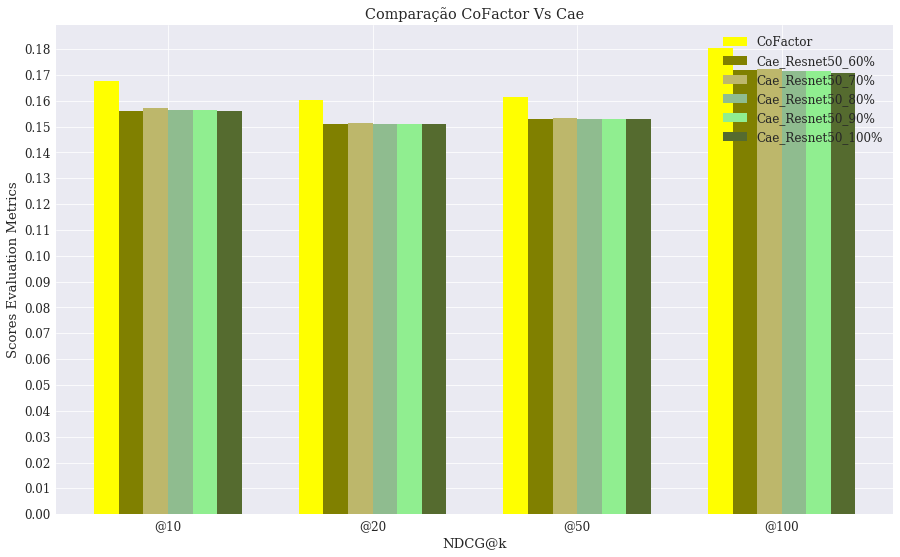

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1562  0.1509  0.1529  0.1717
70%       0.1571  0.1515  0.1535  0.1724
80%       0.1564  0.1510  0.1529  0.1716
90%       0.1565  0.1511  0.1531  0.1714
100%      0.1559  0.1510  0.1529  0.1708





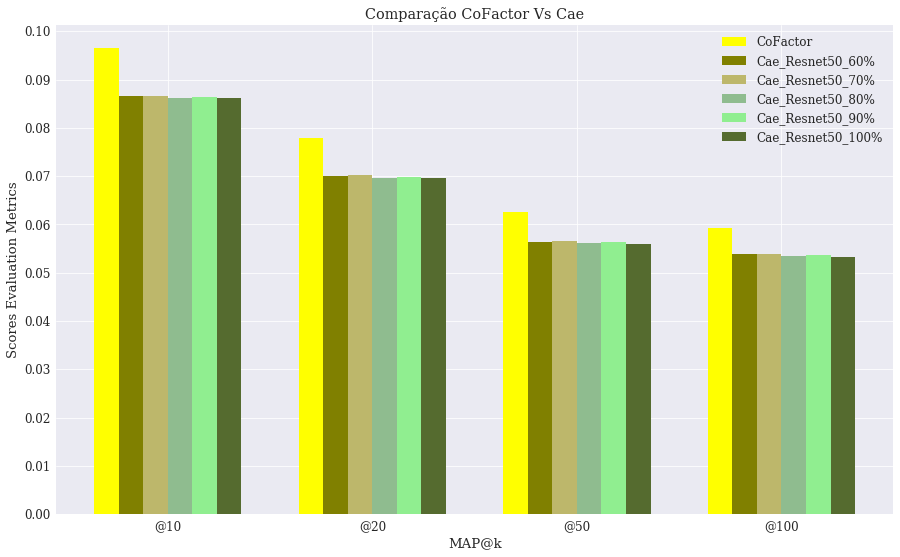

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0866  0.0700  0.0564  0.0538
70%       0.0867  0.0702  0.0565  0.0539
80%       0.0862  0.0696  0.0561  0.0534
90%       0.0865  0.0698  0.0563  0.0536
100%      0.0863  0.0696  0.0560  0.0532


In [10]:
list_file_name = ['cae_resnet50_60_pct_rec_val'
                  , 'cae_resnet50_70_pct_rec_val'
                  , 'cae_resnet50_80_pct_rec_val'
                  , 'cae_resnet50_90_pct_rec_val'
                  , 'cae_resnet50_100_pct_rec_val']
CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Vgg16

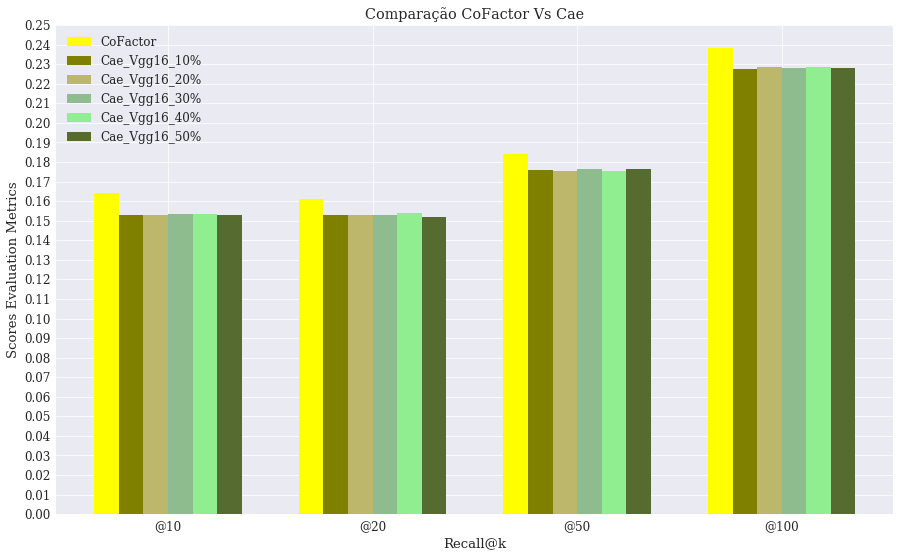

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1529  0.1527  0.1757  0.2273
20%       0.1528  0.1531  0.1755  0.2283
30%       0.1533  0.1529  0.1762  0.2282
40%       0.1535  0.1541  0.1756  0.2284
50%       0.1530  0.1521  0.1764  0.2280





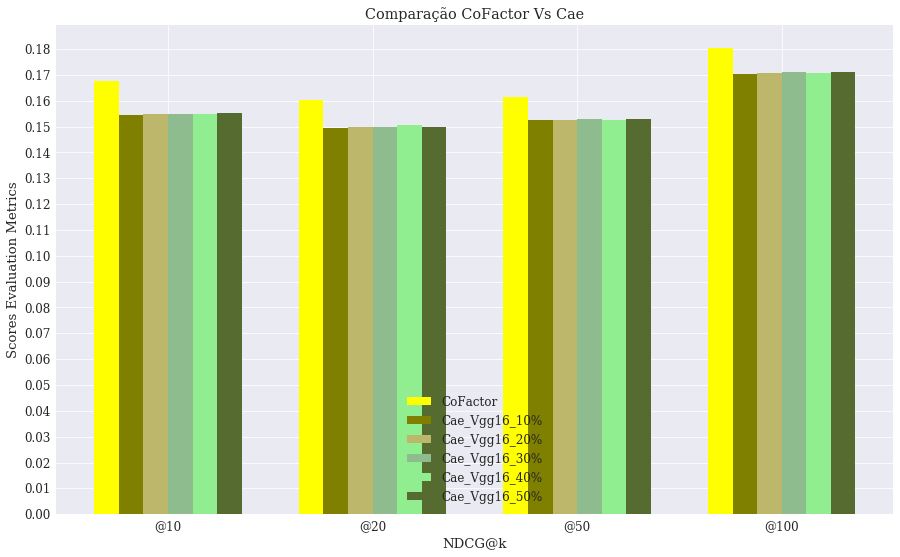

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1544  0.1495  0.1525  0.1705
20%       0.1547  0.1497  0.1525  0.1708
30%       0.1549  0.1497  0.1529  0.1711
40%       0.1549  0.1505  0.1526  0.1709
50%       0.1552  0.1498  0.1531  0.1712





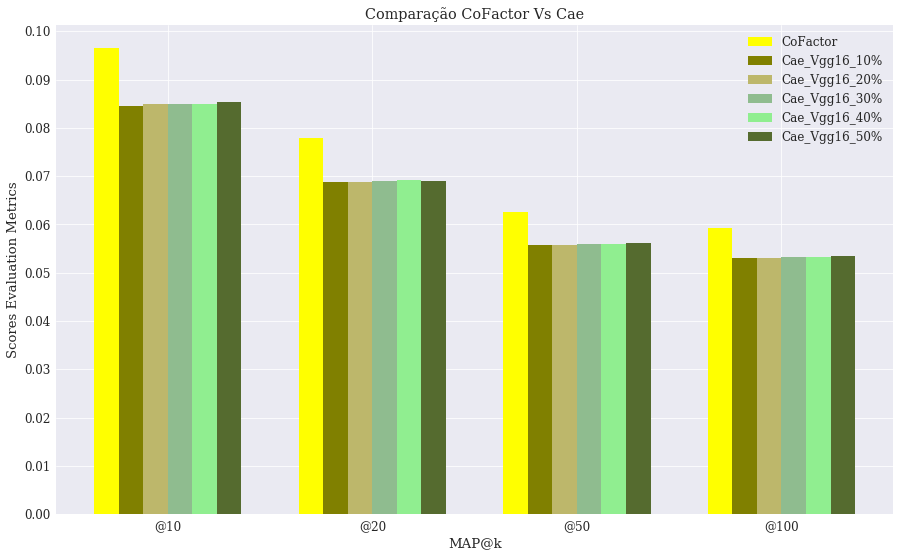

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0845  0.0687  0.0557  0.0530
20%       0.0849  0.0688  0.0558  0.0531
30%       0.0850  0.0690  0.0560  0.0533
40%       0.0850  0.0692  0.0559  0.0532
50%       0.0854  0.0691  0.0561  0.0534


In [11]:
list_file_name = ['cae_vgg16_10_pct_rec_val'
                  , 'cae_vgg16_20_pct_rec_val'
                  , 'cae_vgg16_30_pct_rec_val'
                  , 'cae_vgg16_40_pct_rec_val'
                  , 'cae_vgg16_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

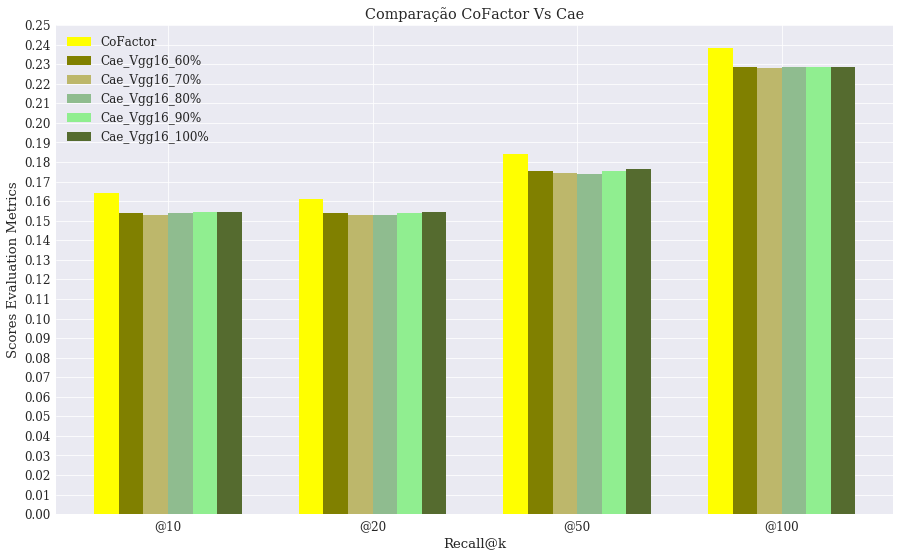

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1539  0.1541  0.1756  0.2284
70%       0.1528  0.1530  0.1742  0.2278
80%       0.1539  0.1527  0.1741  0.2287
90%       0.1546  0.1540  0.1755  0.2286
100%      0.1546  0.1545  0.1763  0.2285





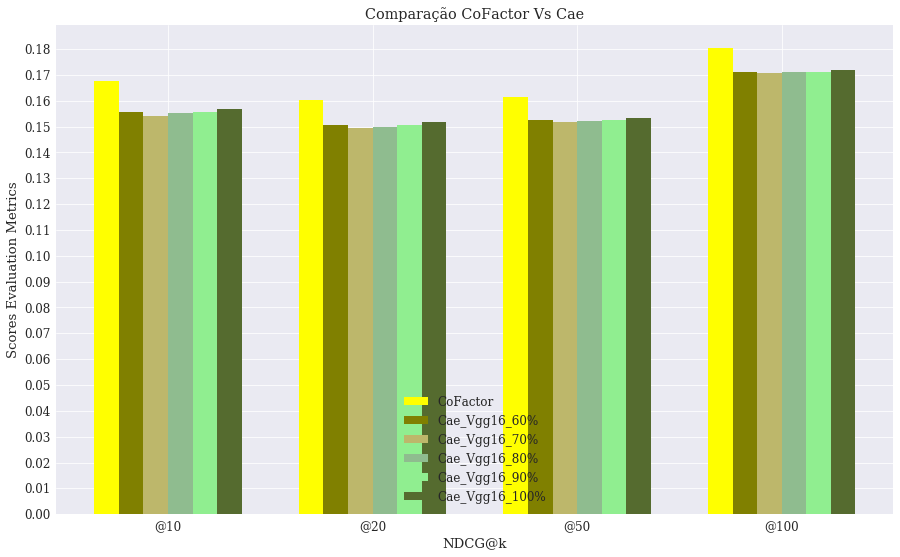

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1555  0.1506  0.1526  0.1712
70%       0.1541  0.1496  0.1519  0.1706
80%       0.1552  0.1499  0.1522  0.1711
90%       0.1556  0.1506  0.1525  0.1712
100%      0.1568  0.1519  0.1535  0.1718





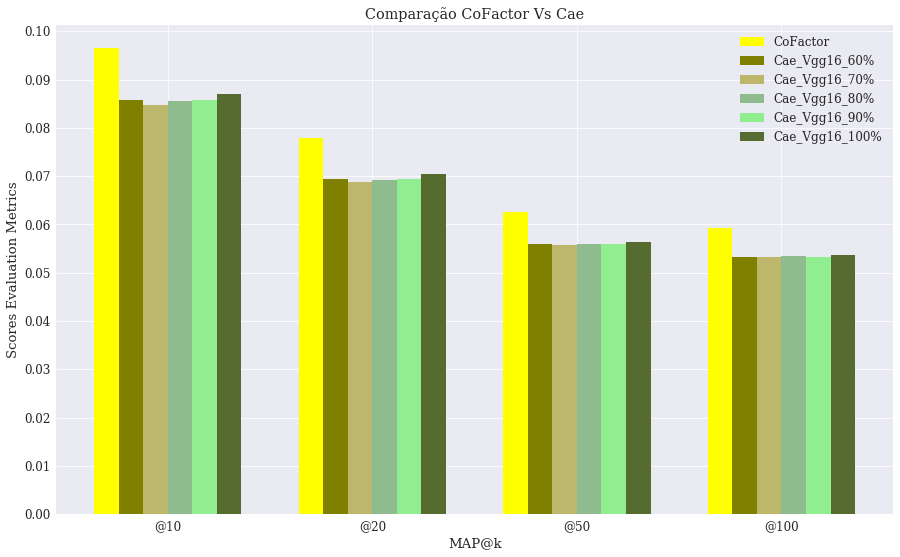

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0858  0.0695  0.0560  0.0533
70%       0.0848  0.0688  0.0557  0.0532
80%       0.0856  0.0693  0.0560  0.0534
90%       0.0857  0.0694  0.0559  0.0533
100%      0.0871  0.0705  0.0564  0.0537


In [12]:
list_file_name = ['cae_vgg16_60_pct_rec_val'
                  , 'cae_vgg16_70_pct_rec_val'
                  , 'cae_vgg16_80_pct_rec_val'
                  , 'cae_vgg16_90_pct_rec_val'
                  ,'cae_vgg16_100_pct_rec_val']
CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Vgg19

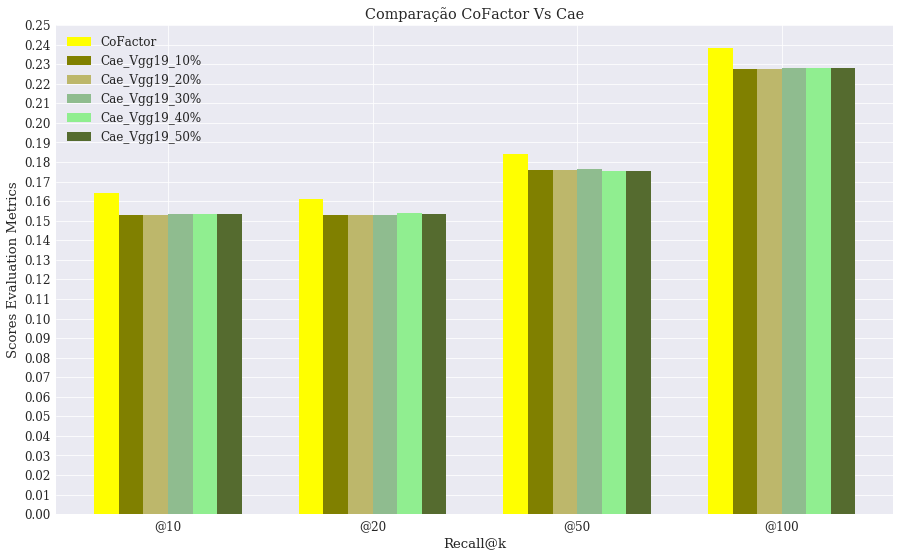

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1529  0.1527  0.1757  0.2273
20%       0.1529  0.1527  0.1757  0.2273
30%       0.1533  0.1527  0.1763  0.2281
40%       0.1534  0.1539  0.1752  0.2282
50%       0.1536  0.1535  0.1752  0.2281





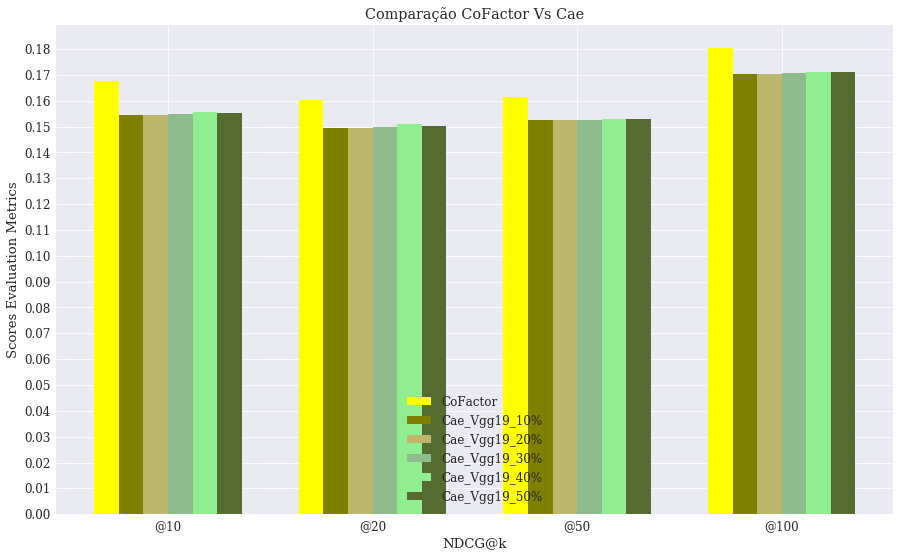

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1544  0.1495  0.1525  0.1705
20%       0.1545  0.1495  0.1525  0.1705
30%       0.1548  0.1497  0.1527  0.1708
40%       0.1558  0.1508  0.1530  0.1713
50%       0.1553  0.1503  0.1528  0.1710





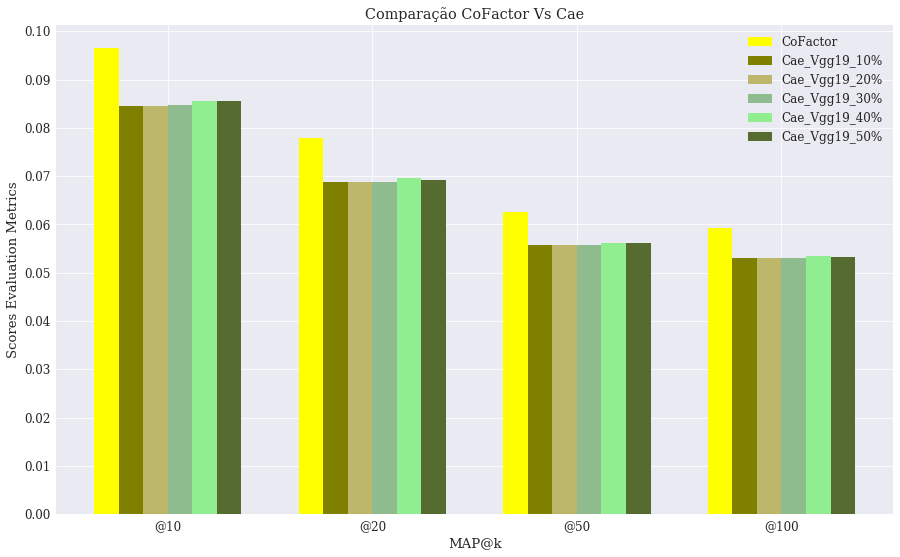

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0845  0.0687  0.0557  0.0530
20%       0.0845  0.0687  0.0557  0.0530
30%       0.0848  0.0688  0.0558  0.0531
40%       0.0856  0.0696  0.0562  0.0535
50%       0.0855  0.0692  0.0561  0.0533


In [13]:
list_file_name = ['cae_vgg19_10_pct_rec_val'
                  , 'cae_vgg19_20_pct_rec_val'
                  , 'cae_vgg19_30_pct_rec_val'
                  , 'cae_vgg19_40_pct_rec_val'
                  , 'cae_vgg19_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

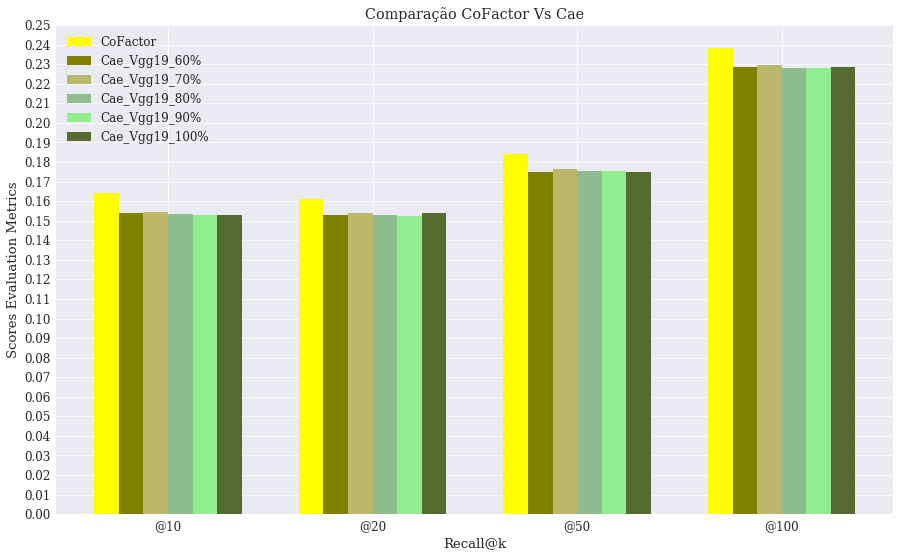

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1537  0.1528  0.1750  0.2283
70%       0.1546  0.1537  0.1763  0.2296
80%       0.1532  0.1529  0.1753  0.2281
90%       0.1529  0.1526  0.1755  0.2281
100%      0.1530  0.1541  0.1750  0.2283





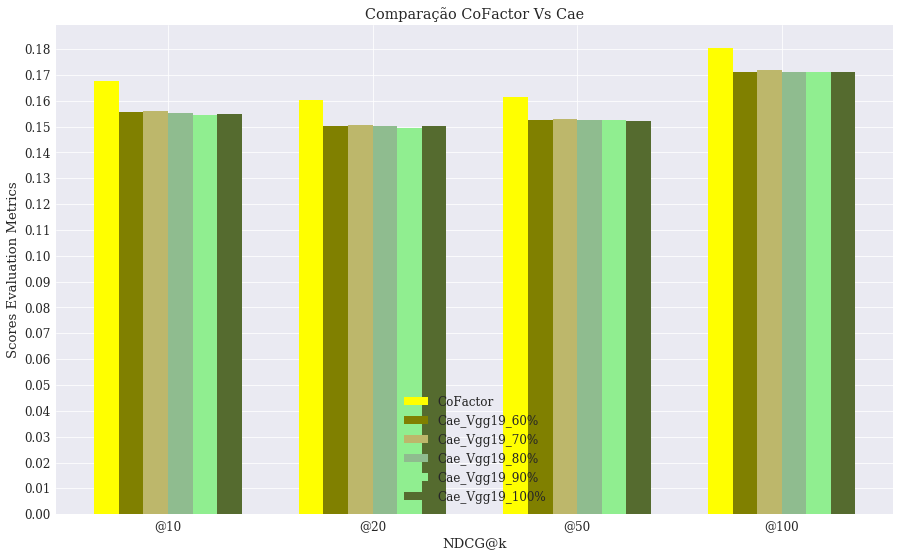

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1557  0.1504  0.1527  0.1711
70%       0.1561  0.1506  0.1529  0.1717
80%       0.1552  0.1503  0.1526  0.1713
90%       0.1546  0.1494  0.1524  0.1710
100%      0.1547  0.1504  0.1523  0.1711





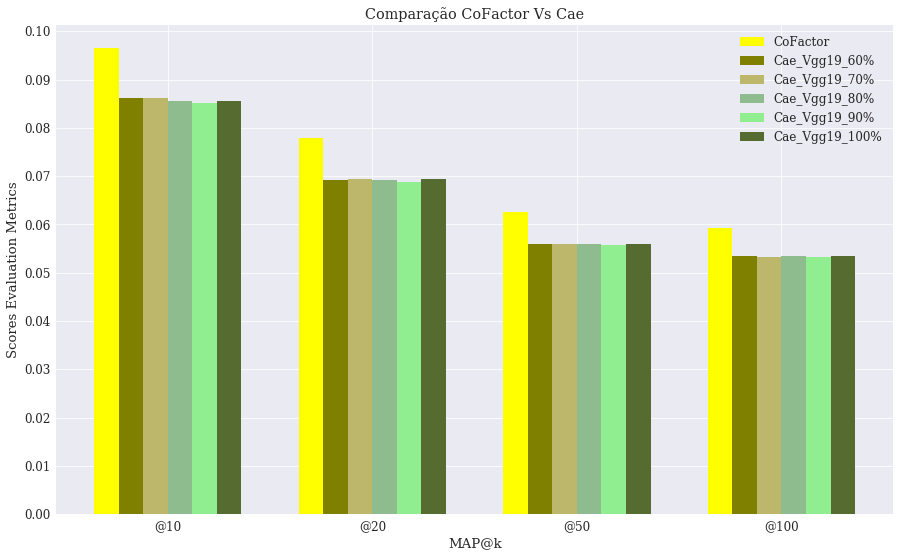

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0861  0.0693  0.0560  0.0534
70%       0.0861  0.0694  0.0560  0.0533
80%       0.0855  0.0693  0.0560  0.0535
90%       0.0852  0.0688  0.0558  0.0533
100%      0.0855  0.0694  0.0560  0.0534


In [14]:
list_file_name = ['cae_vgg19_60_pct_rec_val'
                  , 'cae_vgg19_70_pct_rec_val'
                  , 'cae_vgg19_80_pct_rec_val'
                  , 'cae_vgg19_90_pct_rec_val'
                  , 'cae_vgg19_100_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Xception

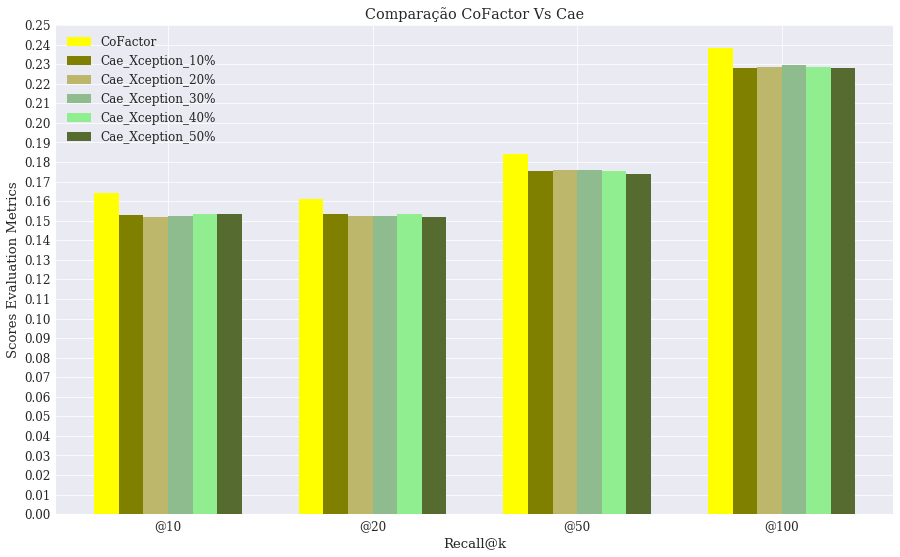

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1531  0.1535  0.1753  0.2282
20%       0.1521  0.1523  0.1757  0.2285
30%       0.1526  0.1523  0.1757  0.2293
40%       0.1536  0.1536  0.1753  0.2283
50%       0.1533  0.1521  0.1740  0.2280





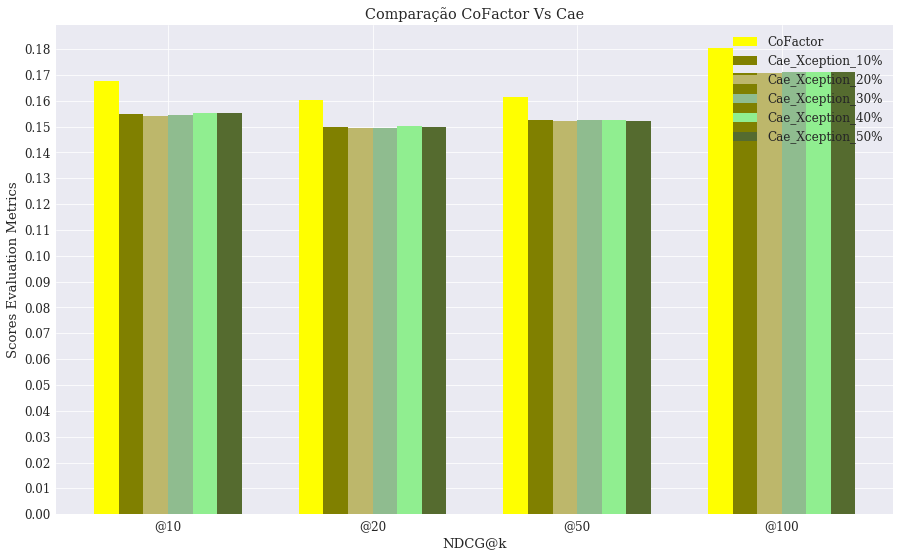

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1547  0.1500  0.1525  0.1708
20%       0.1542  0.1493  0.1523  0.1707
30%       0.1546  0.1496  0.1526  0.1711
40%       0.1551  0.1503  0.1526  0.1711
50%       0.1553  0.1500  0.1520  0.1710





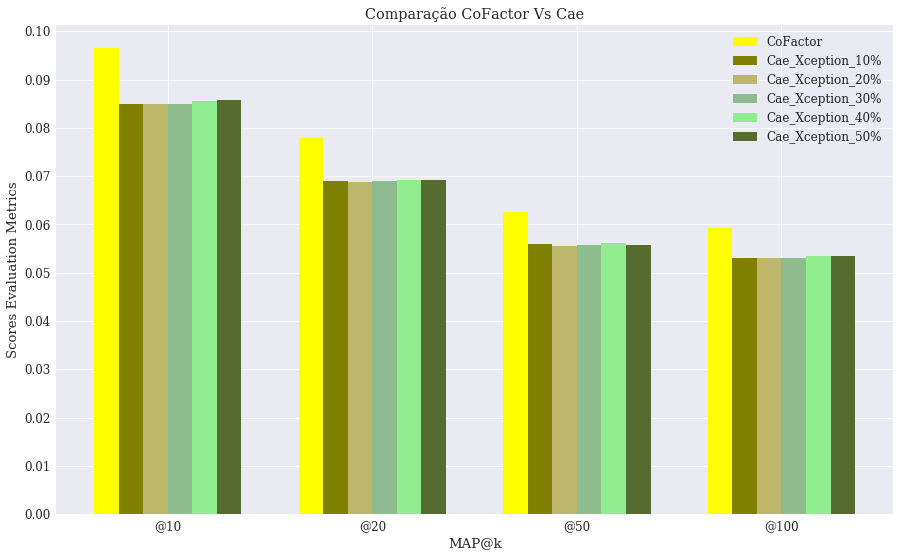

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0850  0.0690  0.0559  0.0531
20%       0.0849  0.0687  0.0556  0.0530
30%       0.0850  0.0690  0.0558  0.0531
40%       0.0856  0.0693  0.0561  0.0534
50%       0.0858  0.0693  0.0558  0.0534


In [15]:
list_file_name = ['cae_xception_10_pct_rec_val'
                  , 'cae_xception_20_pct_rec_val'
                  , 'cae_xception_30_pct_rec_val'
                  , 'cae_xception_40_pct_rec_val'
                  , 'cae_xception_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

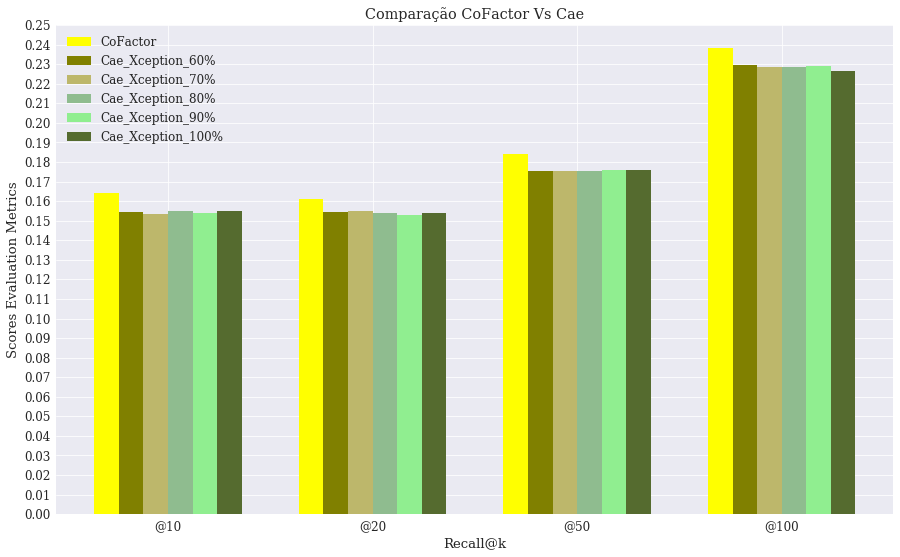

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1543  0.1544  0.1756  0.2295
70%       0.1534  0.1547  0.1752  0.2287
80%       0.1548  0.1541  0.1753  0.2285
90%       0.1539  0.1529  0.1758  0.2289
100%      0.1547  0.1541  0.1757  0.2265





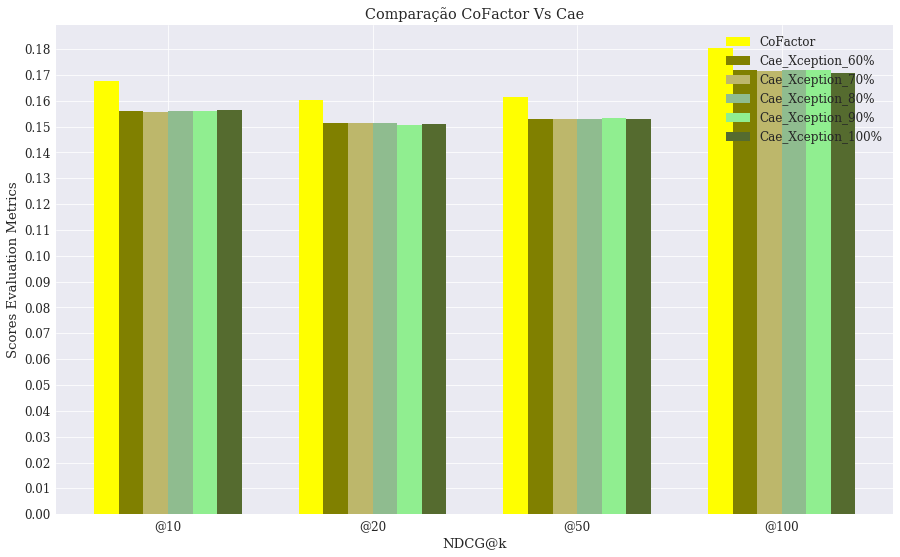

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1562  0.1512  0.1530  0.1719
70%       0.1555  0.1514  0.1530  0.1715
80%       0.1561  0.1512  0.1531  0.1718
90%       0.1559  0.1506  0.1533  0.1718
100%      0.1565  0.1511  0.1531  0.1709





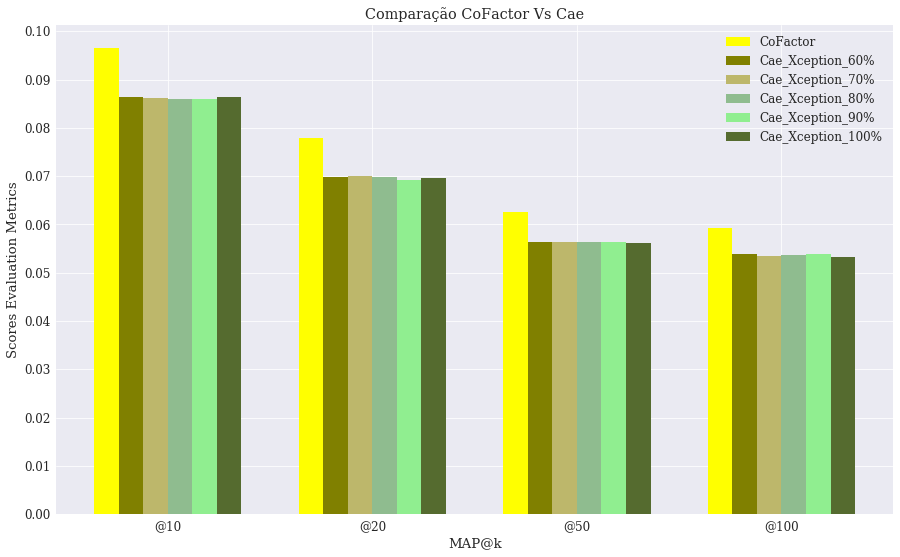

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0865  0.0698  0.0563  0.0538
70%       0.0861  0.0700  0.0563  0.0535
80%       0.0860  0.0698  0.0563  0.0537
90%       0.0859  0.0693  0.0563  0.0538
100%      0.0865  0.0697  0.0561  0.0533


In [16]:
list_file_name = ['cae_xception_60_pct_rec_val'
                  , 'cae_xception_70_pct_rec_val'
                  , 'cae_xception_80_pct_rec_val'
                  , 'cae_xception_90_pct_rec_val'
                  , 'cae_xception_100_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)
